In [50]:
import warnings
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [51]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')

def get_data(path, date):
    data = pd.read_csv(path , header=0, parse_dates=[date], index_col=date, squeeze=True, date_parser=parser)
    return data

In [52]:
y = get_data('../ml-project-data/NIFTY-50/2014.csv', 0).loc[: , "High":"Low"].mean(axis=1)

In [53]:
tcs_y = get_data('../ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv', 2)['Average Price']

In [54]:
# def parser(x):
#     return datetime.strptime(x, '%d-%b-%Y')

# nifty_data_test = pd.read_csv('../ml-project-data/NIFTY-50/2015.csv', header=0, 
#                                                               parse_dates=[0], index_col=0, squeeze=True, 
#                                                               date_parser=parser)

# nifty_data_test['Average'] = nifty_data_test.loc[: , "High":"Low"].mean(axis=1)

In [55]:
act = get_data('../ml-project-data/NIFTY-50/2015.csv', 0).loc[: , "High":"Low"].mean(axis=1)
act = act[:int(len(act)/4)]

In [56]:
tcs_act = get_data('../ml-project-data/TCS/01-01-2015-TO-31-12-2015TCSEQN.csv', 2)['Average Price']
tcs_act = tcs_act[:int(len(act)/4)]

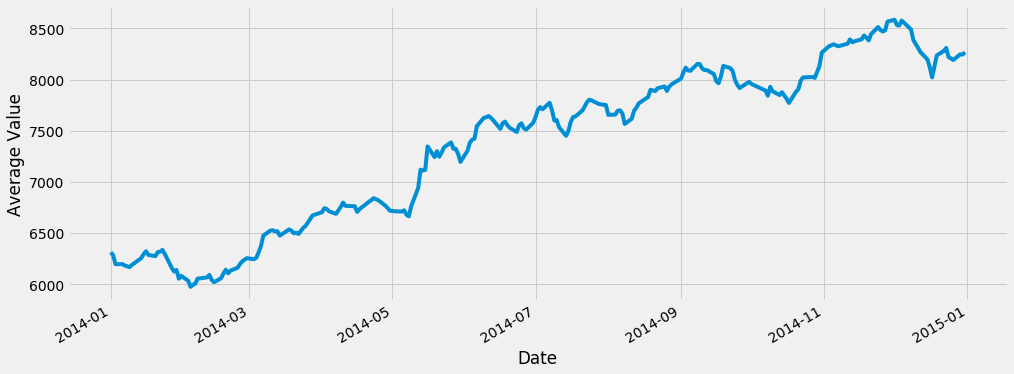

In [57]:
y.plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

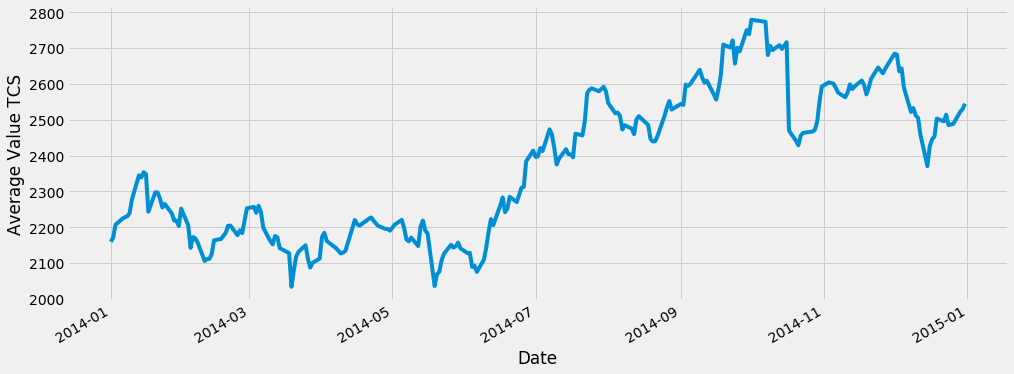

In [58]:
tcs_y.plot(figsize=(15, 6))
plt.ylabel('Average Value TCS')
plt.show()

<Figure size 432x288 with 0 Axes>

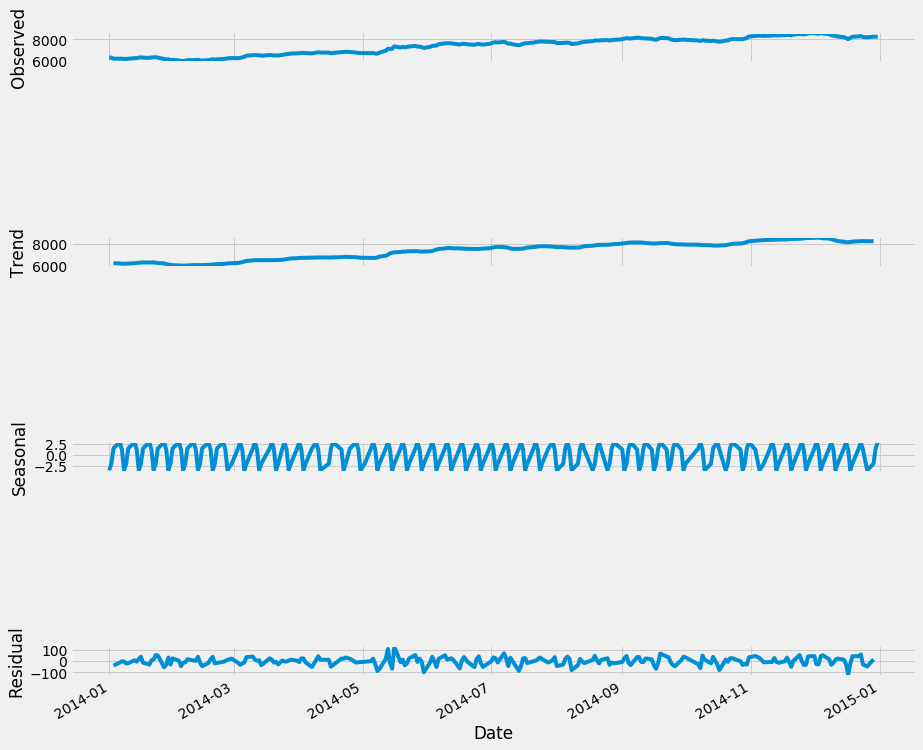

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, freq=5)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 15)

<Figure size 432x288 with 0 Axes>

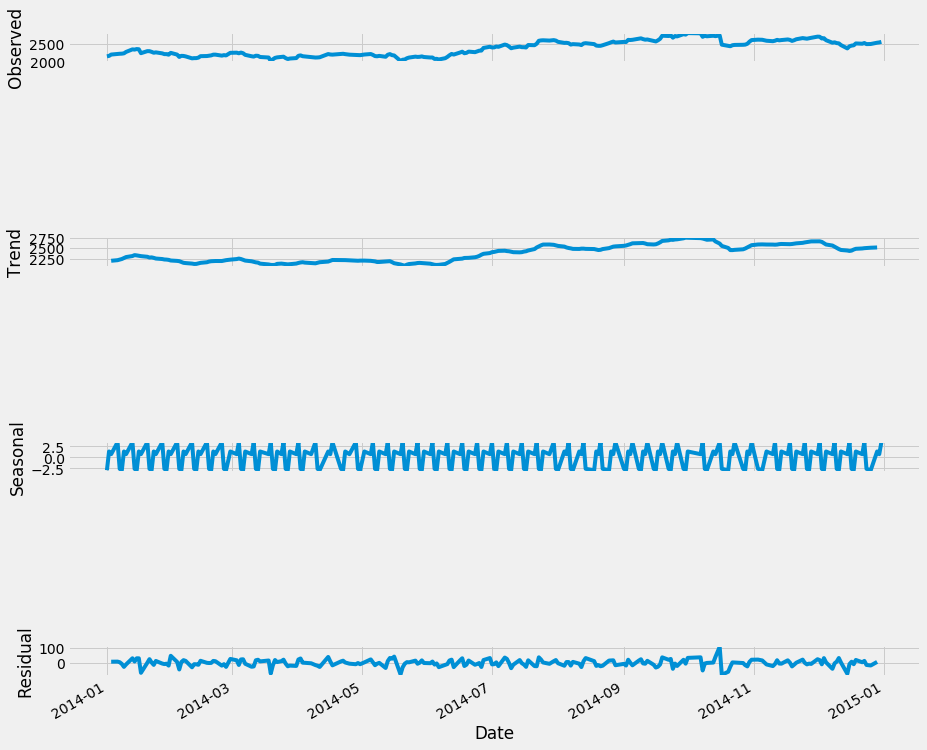

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tcs_y, freq=5)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 15)

In [72]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]

In [73]:
warnings.filterwarnings("ignore")
min = 999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        for trend in ['n', 'c', 't', 'ct']:
            try:
                mod = sm.tsa.statespace.SARIMAX(y, #Change to y when doing nifty
                                                trend=trend,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                dynamic=True)

                results = mod.fit()
                if results.aic < min and results.aic > 100:
                    print('Trend:{} - ARIMA{}x{} - AIC:{}'.format(trend, param, param_seasonal, results.aic))
                    min = results.aic
            except:
                continue

Trend:n - ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:5042.195871437405
Trend:c - ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:3949.61624213861
Trend:ct - ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:3297.865848275863
Trend:n - ARIMA(0, 0, 0)x(0, 1, 0, 5) - AIC:3065.0740589007955
Trend:c - ARIMA(0, 0, 0)x(0, 1, 0, 5) - AIC:3046.8445471793466
Trend:c - ARIMA(0, 0, 0)x(0, 1, 2, 5) - AIC:3042.217427467326
Trend:n - ARIMA(0, 0, 0)x(0, 2, 1, 5) - AIC:3006.4281484270223
Trend:c - ARIMA(0, 0, 0)x(0, 2, 1, 5) - AIC:3006.2612670935596
Trend:t - ARIMA(0, 0, 0)x(0, 2, 1, 5) - AIC:3004.2688902517475
Trend:ct - ARIMA(0, 0, 0)x(0, 2, 1, 5) - AIC:3001.5329762808715
Trend:t - ARIMA(0, 0, 0)x(1, 2, 2, 5) - AIC:2997.0405493072876
Trend:ct - ARIMA(0, 0, 0)x(2, 2, 1, 5) - AIC:2995.5839243845103
Trend:ct - ARIMA(0, 0, 2)x(0, 0, 0, 5) - AIC:2867.1023633416917
Trend:c - ARIMA(0, 0, 2)x(0, 1, 0, 5) - AIC:2736.2559331583034
Trend:c - ARIMA(0, 0, 2)x(0, 1, 1, 5) - AIC:2736.023291362043
Trend:c - ARIMA(0, 0, 2)x(0, 1, 2, 5) - AIC:2718.07708977

In [74]:
warnings.filterwarnings("ignore")
min = 999999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        for trend in ['n', 'c', 't', 'ct']:
            try:
                mod = sm.tsa.statespace.SARIMAX(tcs_y, #Change to y when doing nifty
                                                trend=trend,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                dynamic=True)

                results = mod.fit()
                if results.aic < min and results.aic > 100:
                    print('Trend:{} - ARIMA{}x{} - AIC:{}'.format(trend, param, param_seasonal, results.aic))
                    min = results.aic
            except:
                continue

Trend:n - ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:4488.158131124141
Trend:c - ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:3279.4911063299696
Trend:ct - ARIMA(0, 0, 0)x(0, 0, 0, 5) - AIC:3024.603613222939
Trend:ct - ARIMA(0, 0, 0)x(0, 0, 1, 5) - AIC:2876.5864846752
Trend:n - ARIMA(0, 0, 0)x(0, 1, 0, 5) - AIC:2777.951257161943
Trend:n - ARIMA(0, 0, 0)x(0, 1, 2, 5) - AIC:2768.1743043071992
Trend:c - ARIMA(0, 0, 0)x(0, 1, 2, 5) - AIC:2766.6879295779568
Trend:n - ARIMA(0, 0, 0)x(0, 2, 1, 5) - AIC:2746.3440851646574
Trend:ct - ARIMA(0, 0, 0)x(0, 2, 1, 5) - AIC:2746.077225035674
Trend:n - ARIMA(0, 0, 0)x(2, 2, 1, 5) - AIC:2740.954594278668
Trend:ct - ARIMA(0, 0, 0)x(2, 2, 1, 5) - AIC:2733.696525960865
Trend:ct - ARIMA(0, 0, 1)x(0, 0, 1, 5) - AIC:2696.593463157728
Trend:n - ARIMA(0, 0, 1)x(0, 1, 0, 5) - AIC:2631.9742160438072
Trend:n - ARIMA(0, 0, 1)x(0, 1, 1, 5) - AIC:2621.928373245125
Trend:c - ARIMA(0, 0, 1)x(0, 1, 1, 5) - AIC:2621.791658440864
Trend:n - ARIMA(0, 0, 1)x(0, 1, 2, 5) - AIC:2613.9245788570743

In [75]:
mod = sm.tsa.statespace.SARIMAX(y,
                                trend='n',
                                order=(0, 1, 1),
                                seasonal_order=(2, 1, 1, 5))

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  244
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 5)   Log Likelihood               -1284.956
Date:                           Sat, 01 Dec 2018   AIC                           2579.913
Time:                                   18:03:58   BIC                           2597.274
Sample:                                        0   HQIC                          2586.910
                                           - 244                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2587      0.047      5.487      0.000       0.166       0.351
ar.S.L5        0.0750      0.059      1.265

In [76]:
tcs_mod = sm.tsa.statespace.SARIMAX(tcs_y,
                                trend='n',
                                order=(0, 1, 0),
                                seasonal_order=(2, 1, 1, 5))

tcs_results = tcs_mod.fit()

print(tcs_results.summary())

                                 Statespace Model Results                                
Dep. Variable:                     Average Price   No. Observations:                  244
Model:             SARIMAX(0, 1, 0)x(2, 1, 1, 5)   Log Likelihood               -1194.312
Date:                           Sat, 01 Dec 2018   AIC                           2396.624
Time:                                   18:03:58   BIC                           2410.513
Sample:                                        0   HQIC                          2402.221
                                           - 244                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.0056      0.076     -0.073      0.942      -0.155       0.144
ar.S.L10      -0.1957      0.075     -2.626

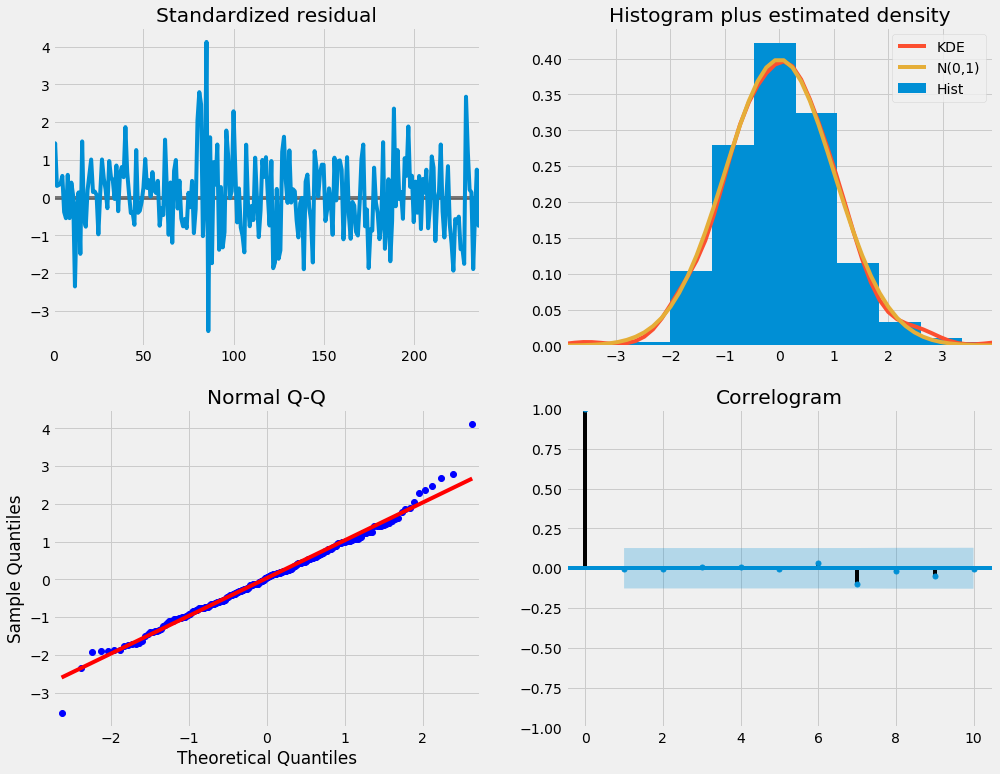

In [77]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

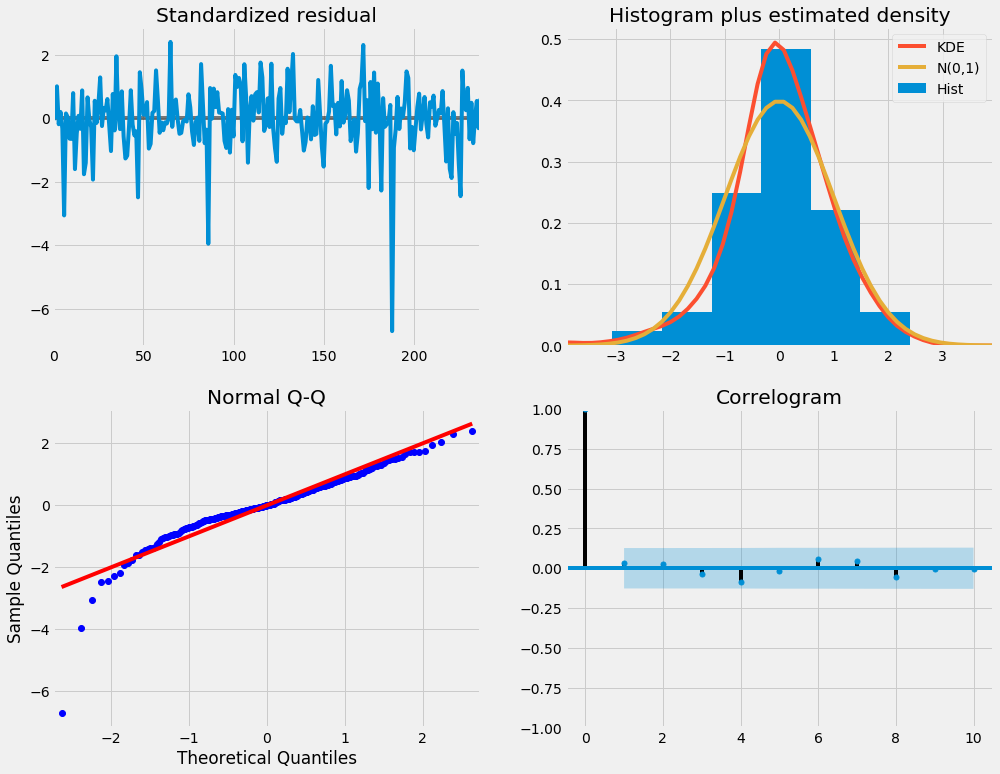

In [78]:
tcs_results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [79]:
# Get forecast 500 steps ahead in future
pred = results.forecast(len(act))

In [80]:
# Get forecast 500 steps ahead in future
tcs_pred = tcs_results.forecast(len(tcs_act))

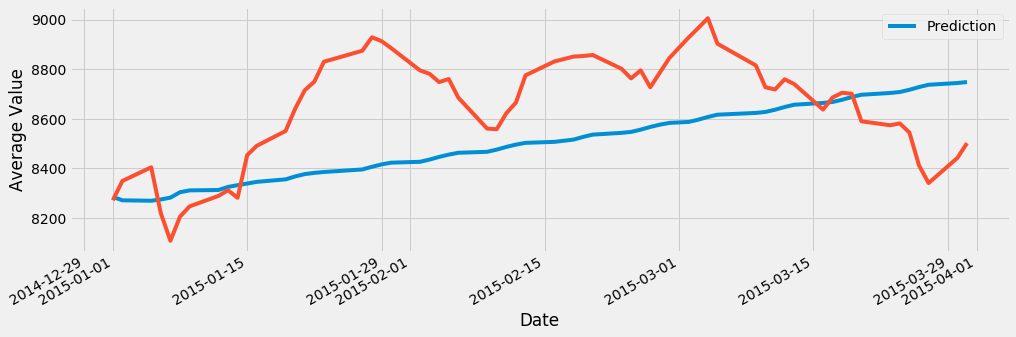

In [81]:
pred = pd.DataFrame(np.array(pred),index = act.index,columns=['Prediction'])
pred.plot(figsize=(15,5), label="Prediction")
act.plot(label="Actual")
plt.ylabel("Average Value")
plt.show()

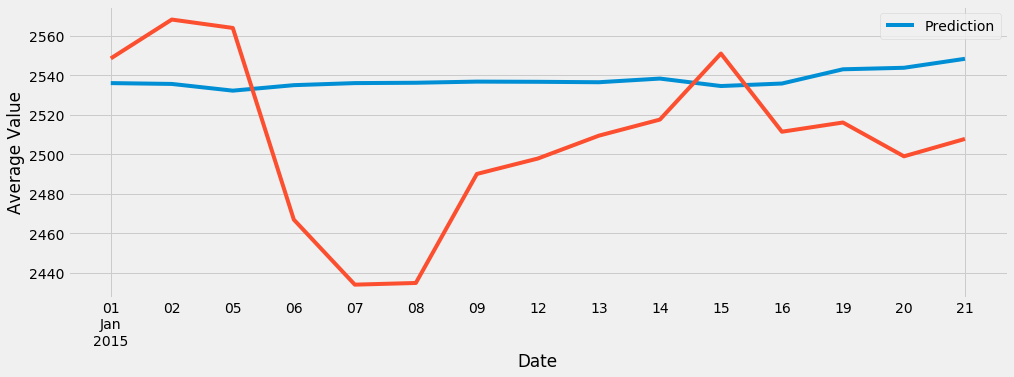

In [82]:
tcs_pred = pd.DataFrame(np.array(tcs_pred),index = tcs_act.index,columns=['Prediction'])
tcs_pred.plot(figsize=(15,5), label="Prediction")
tcs_act.plot(label="Actual")
plt.ylabel("Average Value")
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(act, pred))
print('RMSE: ' + str(rms))

mape = np.mean(np.abs((act.values - pred['Prediction'].values) / act.values)) * 100
print('MAPE: ' + str(mape))

RMSE: 255.6360347124186
MAPE: 2.4679280897563487


In [84]:
tcs_rms = sqrt(mean_squared_error(tcs_act, tcs_pred))
print('RMSE: ' + str(tcs_rms))

tcs_mape = np.mean(np.abs((tcs_act.values - tcs_pred['Prediction'].values) / tcs_act.values)) * 100
print('MAPE: ' + str(tcs_mape))

RMSE: 50.10618388586873
MAPE: 1.70326725062264
